In [80]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [81]:
X_train, y_train, X_test, y_test = load_data()

In [82]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [83]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


dimensions de X :  (100, 2)
dimensions de y :  (100, 1)


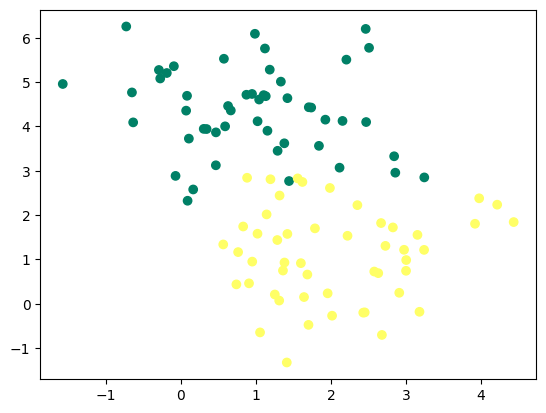

In [36]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X : ', X.shape)
print('dimensions de y : ', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [37]:
def init(X):
	W = np.random.randn(X.shape[1], 1)
	b = np.random.randn(1)
	return (W, b)

In [38]:
def model(X, W, b):
	Z = X.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return (A)

In [39]:
def log_loss(A, y):
	return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [40]:
def gradients(A, X, y):
	dW = 1 / len(y) * np.dot(X.T, A - y)
	db = 1 / len(y) * np.sum(A - y)
	return (dW, db)

In [41]:
def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return (W, b)

In [65]:
def predict(X, W, b):
	A = model(X, W, b)
	print(A)
	return A >= 0.5

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iteration = 100):
	W, b = init(X)

	history = []
	Loss = []
	
	for i in range(n_iteration):
		A = model(X, W, b)
		Loss.append(log_loss(A, y))
		dW, db = gradients(A, X, y)
		W, b = update(dW, db, W, b, learning_rate)
		history.append([W, b, Loss, i])
	
	y_pred = predict(X, W, b)
	print(accuracy_score(y, y_pred))

	plt.plot(Loss)
	plt.show()

	return (W, b)

[[9.70871570e-01]
 [8.67494812e-01]
 [3.26885488e-03]
 [1.68370703e-01]
 [9.75647618e-01]
 [3.64241863e-01]
 [5.39211003e-02]
 [9.53656101e-01]
 [3.79104521e-02]
 [9.32788714e-01]
 [2.19114169e-02]
 [9.27808860e-01]
 [1.44527923e-02]
 [1.29397697e-02]
 [7.83268208e-01]
 [9.86550798e-01]
 [9.95852752e-01]
 [2.92660447e-02]
 [8.46498512e-01]
 [7.36984417e-01]
 [2.96634014e-02]
 [2.60596467e-02]
 [4.32168839e-01]
 [3.08258674e-03]
 [9.71810151e-01]
 [2.09868170e-02]
 [9.47043779e-01]
 [3.90596838e-03]
 [4.39565508e-02]
 [7.80548730e-01]
 [9.90063964e-01]
 [2.94999152e-02]
 [7.81917776e-01]
 [9.90212118e-01]
 [4.22040274e-01]
 [1.81401969e-01]
 [8.60939792e-01]
 [5.76868090e-01]
 [4.63528252e-01]
 [5.72721300e-01]
 [7.31081454e-02]
 [3.62172893e-02]
 [3.95995069e-04]
 [1.45533380e-01]
 [2.08971345e-01]
 [8.84218606e-01]
 [9.85102056e-01]
 [9.83500668e-01]
 [3.15546080e-03]
 [5.02391711e-03]
 [9.69125207e-01]
 [6.81899123e-01]
 [1.97533324e-02]
 [2.45299489e-02]
 [8.19258323e-01]
 [2.783104

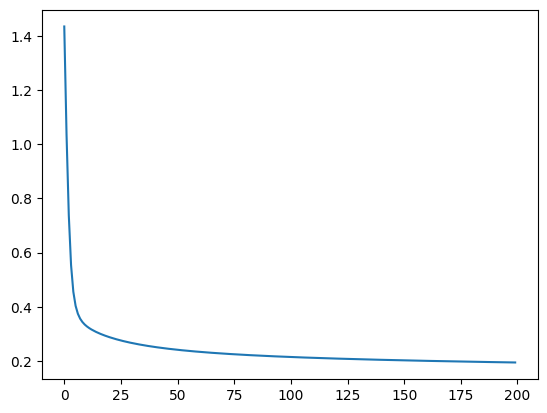

In [77]:
W, b = artificial_neuron(X, y)

/var/folders/py/6ssyzsqd3c18gsvqqxmygmph0000gn/T/ipykernel_86816/1046310656.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')


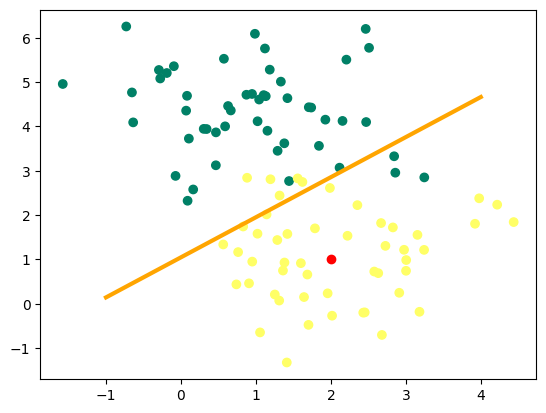

[0.92245921]


array([ True])

In [79]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
predict(new_plant, W, b)

In [103]:
def convert_img_var(nb_image, sz, imgs):
	tab_var = []
	tab_img = []
	tab_ligne = []

	for i in range(nb_image):
		for j in range(sz):
			for k in range(sz):
				tab_ligne.append((imgs[i][j][k]) / 255)
			tab_img.append(tab_ligne)
			tab_ligne = []
		tab_var.append(tab_img)
		tab_img = []
	
	return (tab_var)

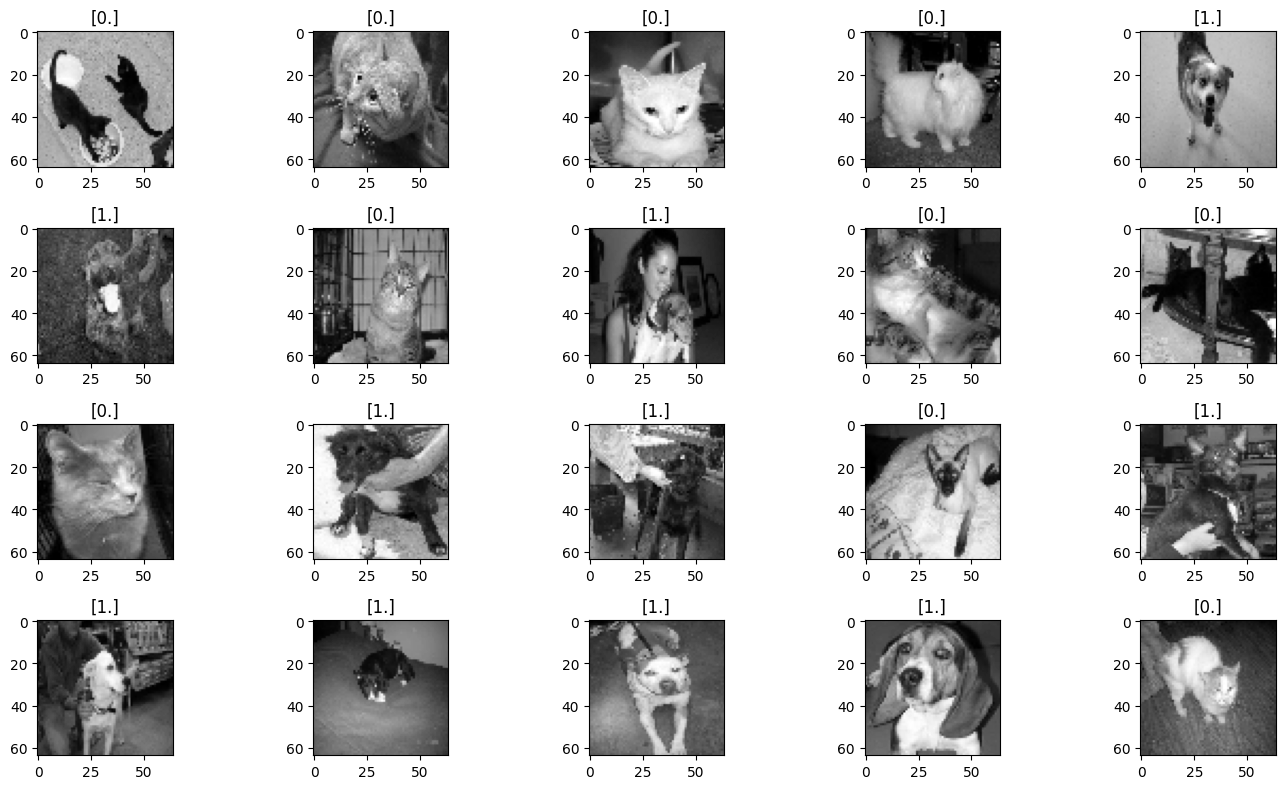

164
164.0 0.6431372549019608
[0.]


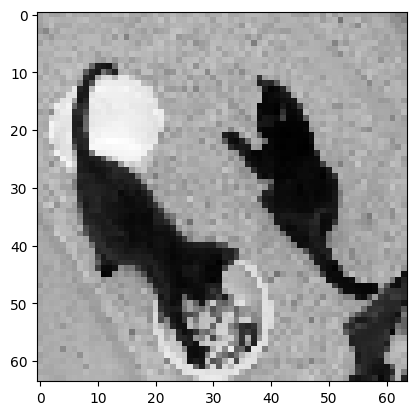

In [104]:
plt.figure(figsize=(16, 8))
for i in range(0, 20):
	plt.subplot(4, 5, i+1)
	plt.imshow(X_train[i], cmap='gray')
	plt.title(y_train[i])
	plt.tight_layout()
plt.show()
print(X_train[0][0][0])
tab_img = convert_img_var(1000, 64, X_train)
print(tab_img[0][0][0] * 255, tab_img[0][0][0])
print(y_train[9])
plt.imshow(X_train[0], cmap='gray')
plt.show()

